# Microsoft Stock Analysis: Trends, Volatility & Visualization
#####  by Rohit Babu

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"MSFT_1986-03-13_2025-02-04.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059827,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.061963,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063032,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061429,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060361,47894400
...,...,...,...,...,...,...,...
9795,2025-01-28,434.600006,448.380005,431.380005,447.200012,447.200012,23491700
9796,2025-01-29,446.690002,446.880005,440.399994,442.329987,442.329987,23581400
9797,2025-01-30,418.769989,422.859985,413.160004,414.989990,414.989990,54586300
9798,2025-01-31,418.980011,420.690002,414.910004,415.059998,415.059998,34223400


In [5]:
df.shape

(9800, 7)

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
df["Date"]=pd.to_datetime(df["Date"],errors='coerce')

In [9]:
print(df["Date"])

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9795   2025-01-28
9796   2025-01-29
9797   2025-01-30
9798   2025-01-31
9799   2025-02-03
Name: Date, Length: 9800, dtype: datetime64[ns]


In [10]:
df["Date"].isnull().sum()

0

In [11]:
df["Date"].duplicated().sum()

0

## EDA (Exploratory Data Analysis ) 

In [12]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,9800,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9.800000e+03
mean,2005-08-14 05:24:00.000000128,63.173728,63.812493,62.513818,63.187157,57.451679,5.630897e+07
min,1986-03-13 00:00:00,0.088542,0.092014,0.088542,0.090278,0.055554,2.304000e+06
25%,1995-11-16 18:00:00,5.898438,5.976563,5.794922,5.880860,3.618860,3.141062e+07
50%,2005-08-11 12:00:00,27.436250,27.770000,27.200001,27.490000,19.266710,4.946235e+07
75%,2015-05-07 06:00:00,47.597813,48.145000,47.062500,47.592500,40.066001,7.027870e+07
max,2025-02-03 00:00:00,467.000000,468.350006,464.459991,467.559998,465.786438,1.031789e+09
std,NaN,98.682750,99.575073,97.725918,98.697881,98.714771,3.812127e+07


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9800 non-null   datetime64[ns]
 1   Open       9800 non-null   float64       
 2   High       9800 non-null   float64       
 3   Low        9800 non-null   float64       
 4   Close      9800 non-null   float64       
 5   Adj Close  9800 non-null   float64       
 6   Volume     9800 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 536.1 KB


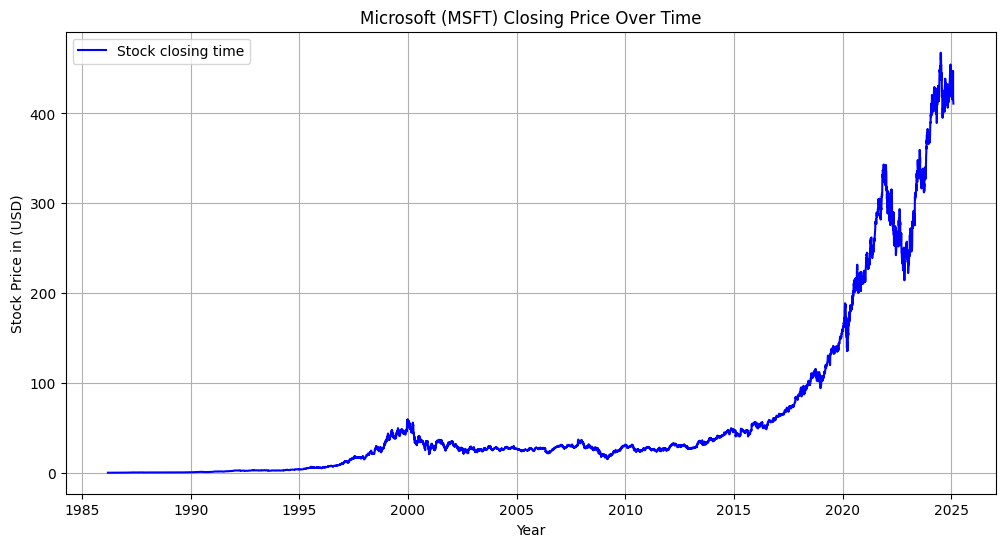

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"],df["Close"],label="Stock closing time",color="Blue")
plt.xlabel("Year")
plt.ylabel("Stock Price in (USD)")
plt.title("Microsoft (MSFT) Closing Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

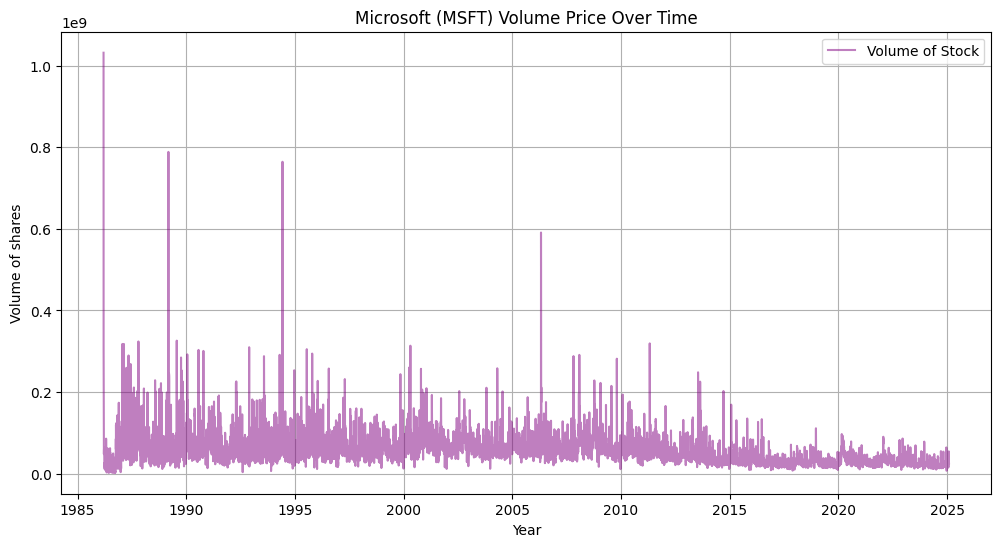

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"],df["Volume"],label="Volume of Stock",color='Purple',alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Volume of shares")
plt.title("Microsoft (MSFT) Volume Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
df["MA_50"] =df["Close"].rolling(window=50).mean()
df["MA_200"]=df["Close"].rolling(window=200).mean()
9

9

In [17]:
print(df["MA_200"])

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
9795    425.681300
9796    425.753300
9797    425.718750
9798    425.725849
9799    425.707550
Name: MA_200, Length: 9800, dtype: float64


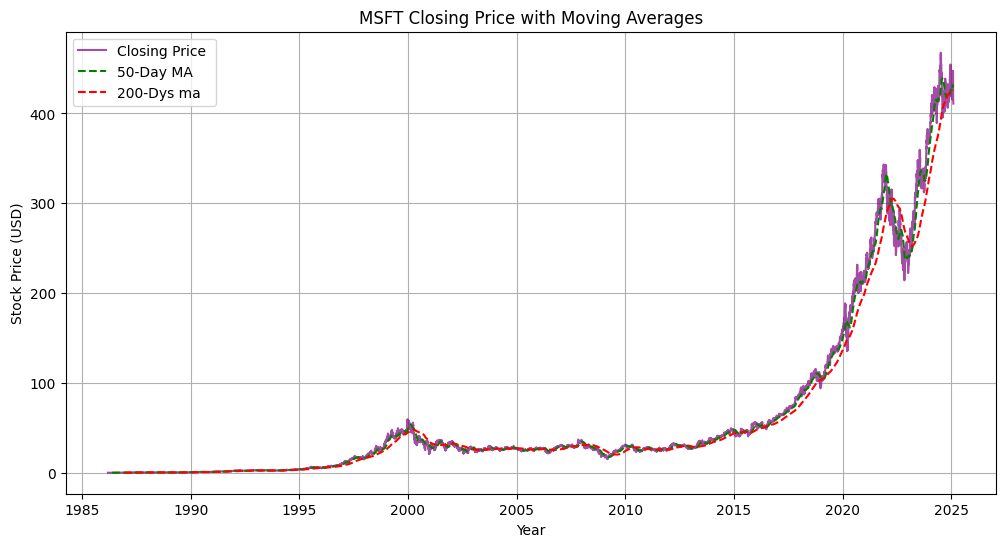

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"],df["Close"],label="Closing Price ", color ='purple',alpha=0.7)
plt.plot(df["Date"],df["MA_50"],label="50-Day MA " ,color ='green',linestyle="dashed")
plt.plot(df["Date"],df["MA_200"],label="200-Dys ma " , color ='red',linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.title("MSFT Closing Price with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()



In [19]:


df["Daily Return"]=df["Close"].pct_change()


In [20]:
print(df["Daily Return"])

0            NaN
1       0.035712
2       0.017250
3      -0.025432
4      -0.017390
          ...   
9795    0.029087
9796   -0.010890
9797   -0.061809
9798    0.000169
9799   -0.009974
Name: Daily Return, Length: 9800, dtype: float64


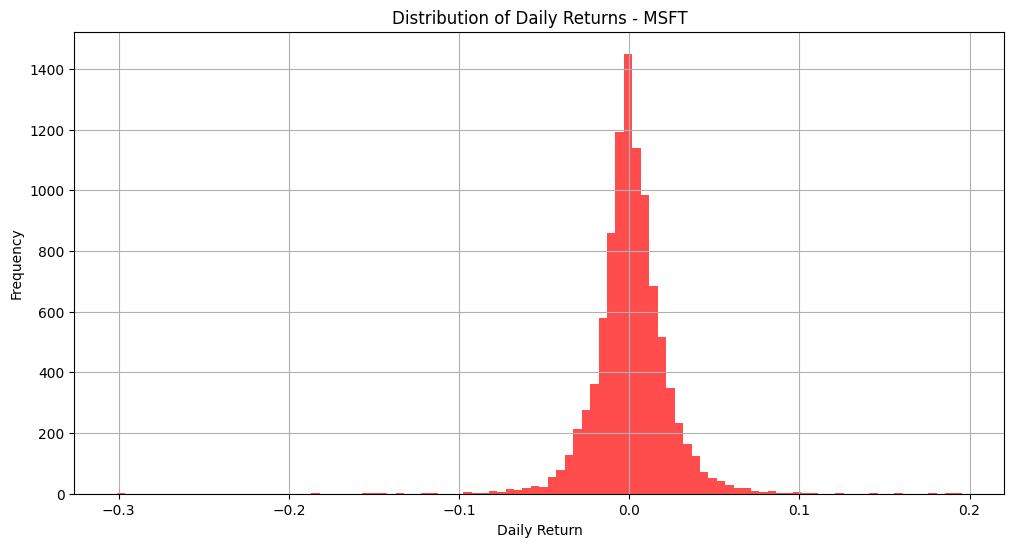

In [21]:
plt.figure(figsize=(12,6))
plt.hist(df["Daily Return"].dropna(),bins=100,color="red",alpha=0.7)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title("Distribution of Daily Returns - MSFT")
plt.grid(True)
plt.show()

In [22]:
df["Cummulative Return"]=(1+ df["Daily Return"]).cumprod()

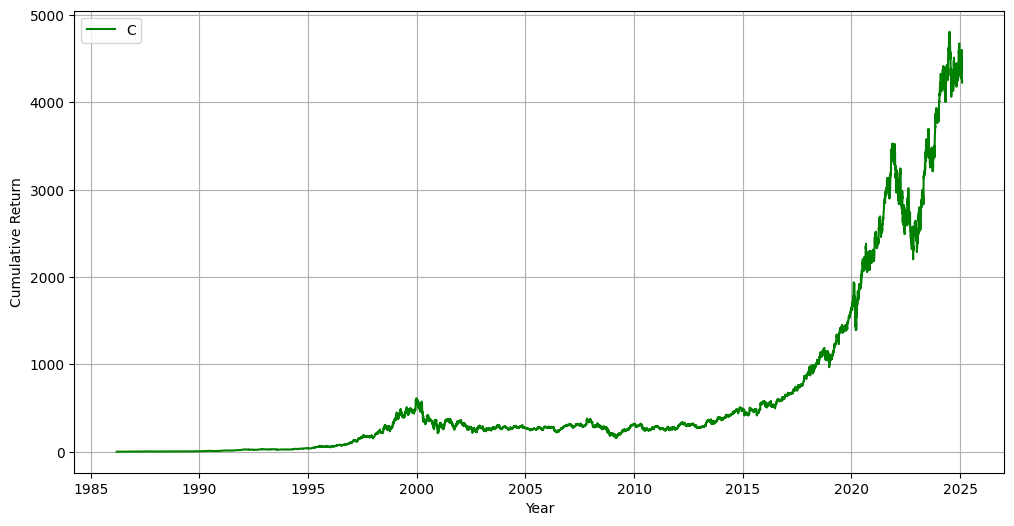

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"],df["Cummulative Return"],label='Cumulative Return',color='green')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.legend('Cumulative Returns Over Time - MSFT')
plt.grid(True)
plt.show()

In [31]:
df["Volatility_300"]=df['Daily Return'].rolling(window=30).std()

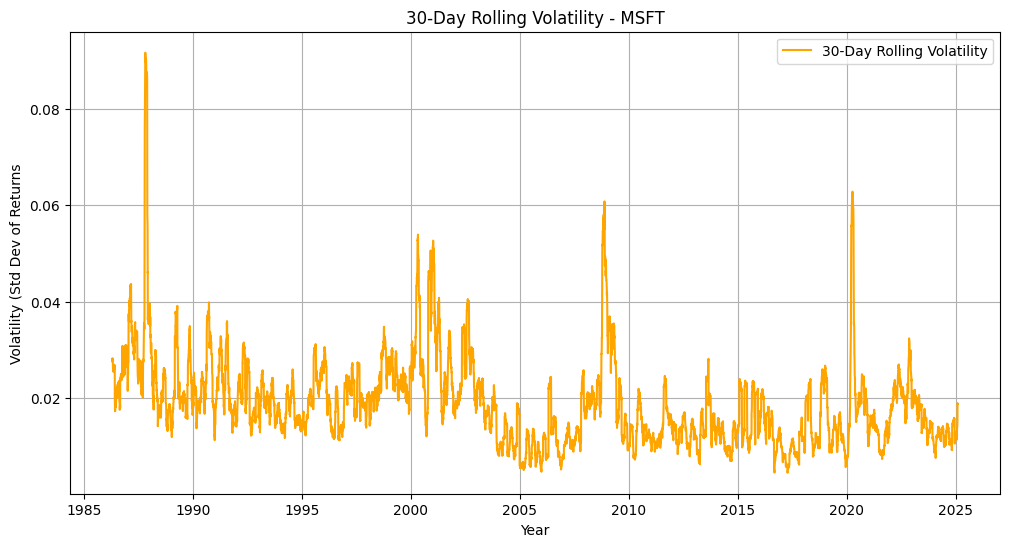

In [32]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"],df["Volatility_300"], label="30-Day Rolling Volatility",color="orange")
plt.xlabel("Year")
plt.ylabel("Volatility (Std Dev of Returns")
plt.title("30-Day Rolling Volatility - MSFT")
plt.grid(True)
plt.legend()
plt.show()